<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Pre_processing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation : biblothèques et récupération dataframes

In [2]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import missingno as msno

from pandas.plotting import scatter_matrix

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

--2023-05-24 17:25:26--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-05-24 17:25:27 (42.8 MB/s) - ‘visualization.py’ saved [13023/13023]

--2023-05-24 17:25:27--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [54]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv

--2023-05-24 18:38:56--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-24 18:38:57 (16.8 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-24 18:38:57--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [5]:
df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')

# Visuels rapides

## Visu rapide sur testinputs.csv

In [ ]:
df_test_inputs.shape

(8001, 14)

In [ ]:
df_test_inputs.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,3641.000000,8001.000000,8001.000000,8001.00000,8001.000000,8001.000000,8001.000000
mean,159.849919,156.836130,159.678965,113.379749,11.968191,12.254094,0.388753,11.971056,6.548061,23.58853,17.929671,97.607625,6.549979
std,15.624188,11.683895,15.238943,3.547692,0.266558,0.145903,0.024336,0.003082,0.097780,2.57426,6.709905,7.023431,0.095063
min,101.900000,0.000000,103.500000,102.420000,0.000000,0.570000,0.250000,11.970000,5.810000,0.00000,0.000000,0.000000,5.900000
25%,148.500000,148.970000,149.500000,111.090000,11.850000,12.210000,0.380000,11.970000,6.410000,22.23000,13.600000,94.290000,6.420000
50%,158.000000,156.220000,158.700000,113.200000,12.040000,12.250000,0.390000,11.970000,6.610000,23.82000,16.500000,98.410000,6.610000
75%,169.100000,164.490000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.24000,20.200000,102.230000,6.610000
max,198.200000,191.340000,198.000000,186.310000,12.150000,12.500000,0.420000,11.990000,6.660000,36.43000,72.600000,133.550000,6.680000


In [ ]:
with pd.option_context('display.max_columns', df_test_inputs.shape[1]):
    print(df_test_inputs.describe(include='all'))

                    PROC_TRACEINFO  OP070_V_1_angle_value  \
count                         8001            8001.000000   
unique                        8001                    NaN   
top     I-B-XA1207672-190520-00632                    NaN   
freq                             1                    NaN   
mean                           NaN             159.849919   
std                            NaN              15.624188   
min                            NaN             101.900000   
25%                            NaN             148.500000   
50%                            NaN             158.000000   
75%                            NaN             169.100000   
max                            NaN             198.200000   

        OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
count                     8001.000000            8001.000000   
unique                            NaN                    NaN   
top                               NaN                    NaN   
freq       

## Visu rapide sur traininginputs.csv

In [ ]:
df_training_inputs.shape

(34515, 14)

In [ ]:
df_training_inputs.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000


In [ ]:
with pd.option_context('display.max_columns', df_training_inputs.shape[1]):
    print(df_training_inputs.describe(include='all'))

                    PROC_TRACEINFO  OP070_V_1_angle_value  \
count                        34515           34515.000000   
unique                       34515                    NaN   
top     I-B-XA1207672-190429-00688                    NaN   
freq                             1                    NaN   
mean                           NaN             159.906922   
std                            NaN              15.662650   
min                            NaN             101.800000   
25%                            NaN             148.700000   
50%                            NaN             158.000000   
75%                            NaN             169.300000   
max                            NaN             198.300000   

        OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
count                    34515.000000           34515.000000   
unique                            NaN                    NaN   
top                               NaN                    NaN   
freq       

## Visu rapide sur trainingoutput.csv



In [ ]:
df_training_output.shape

(34515, 2)

In [ ]:
df_training_output.describe()

,Binar OP130_Resultat_Global_v
count,34515.000000
mean,0.008837
std,0.093589
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
with pd.option_context('display.max_columns', df_training_output.shape[1]):
    print(df_training_output.describe(include='all'))

                    PROC_TRACEINFO  Binar OP130_Resultat_Global_v
count                        34515                   34515.000000
unique                       34515                            NaN
top     I-B-XA1207672-190429-00688                            NaN
freq                             1                            NaN
mean                           NaN                       0.008837
std                            NaN                       0.093589
min                            NaN                       0.000000
25%                            NaN                       0.000000
50%                            NaN                       0.000000
75%                            NaN                       0.000000
max                            NaN                       1.000000


# 1st and 2nd order statistics

array([[<Axes: title={'center': 'OP070_V_1_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingPeakForce_value'}>,
        <Axes: title={'center': 'OP070_V_2_angle_value'}>,
        <Axes: title={'center': 'OP120_Rodage_I_mesure_value'}>],
       [<Axes: title={'center': 'OP090_SnapRingFinalStroke_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_torque_value'}>,
        <Axes: title={'center': 'OP100_Capuchon_insertion_mesure'}>,
        <Axes: title={'center': 'OP120_Rodage_U_mesure_value'}>],
       [<Axes: title={'center': 'OP070_V_1_torque_value'}>,
        <Axes: title={'center': 'OP090_StartLinePeakForce_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingMidPointForce_val'}>],
       [<Axes: title={'center': 'OP070_V_2_torque_value'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

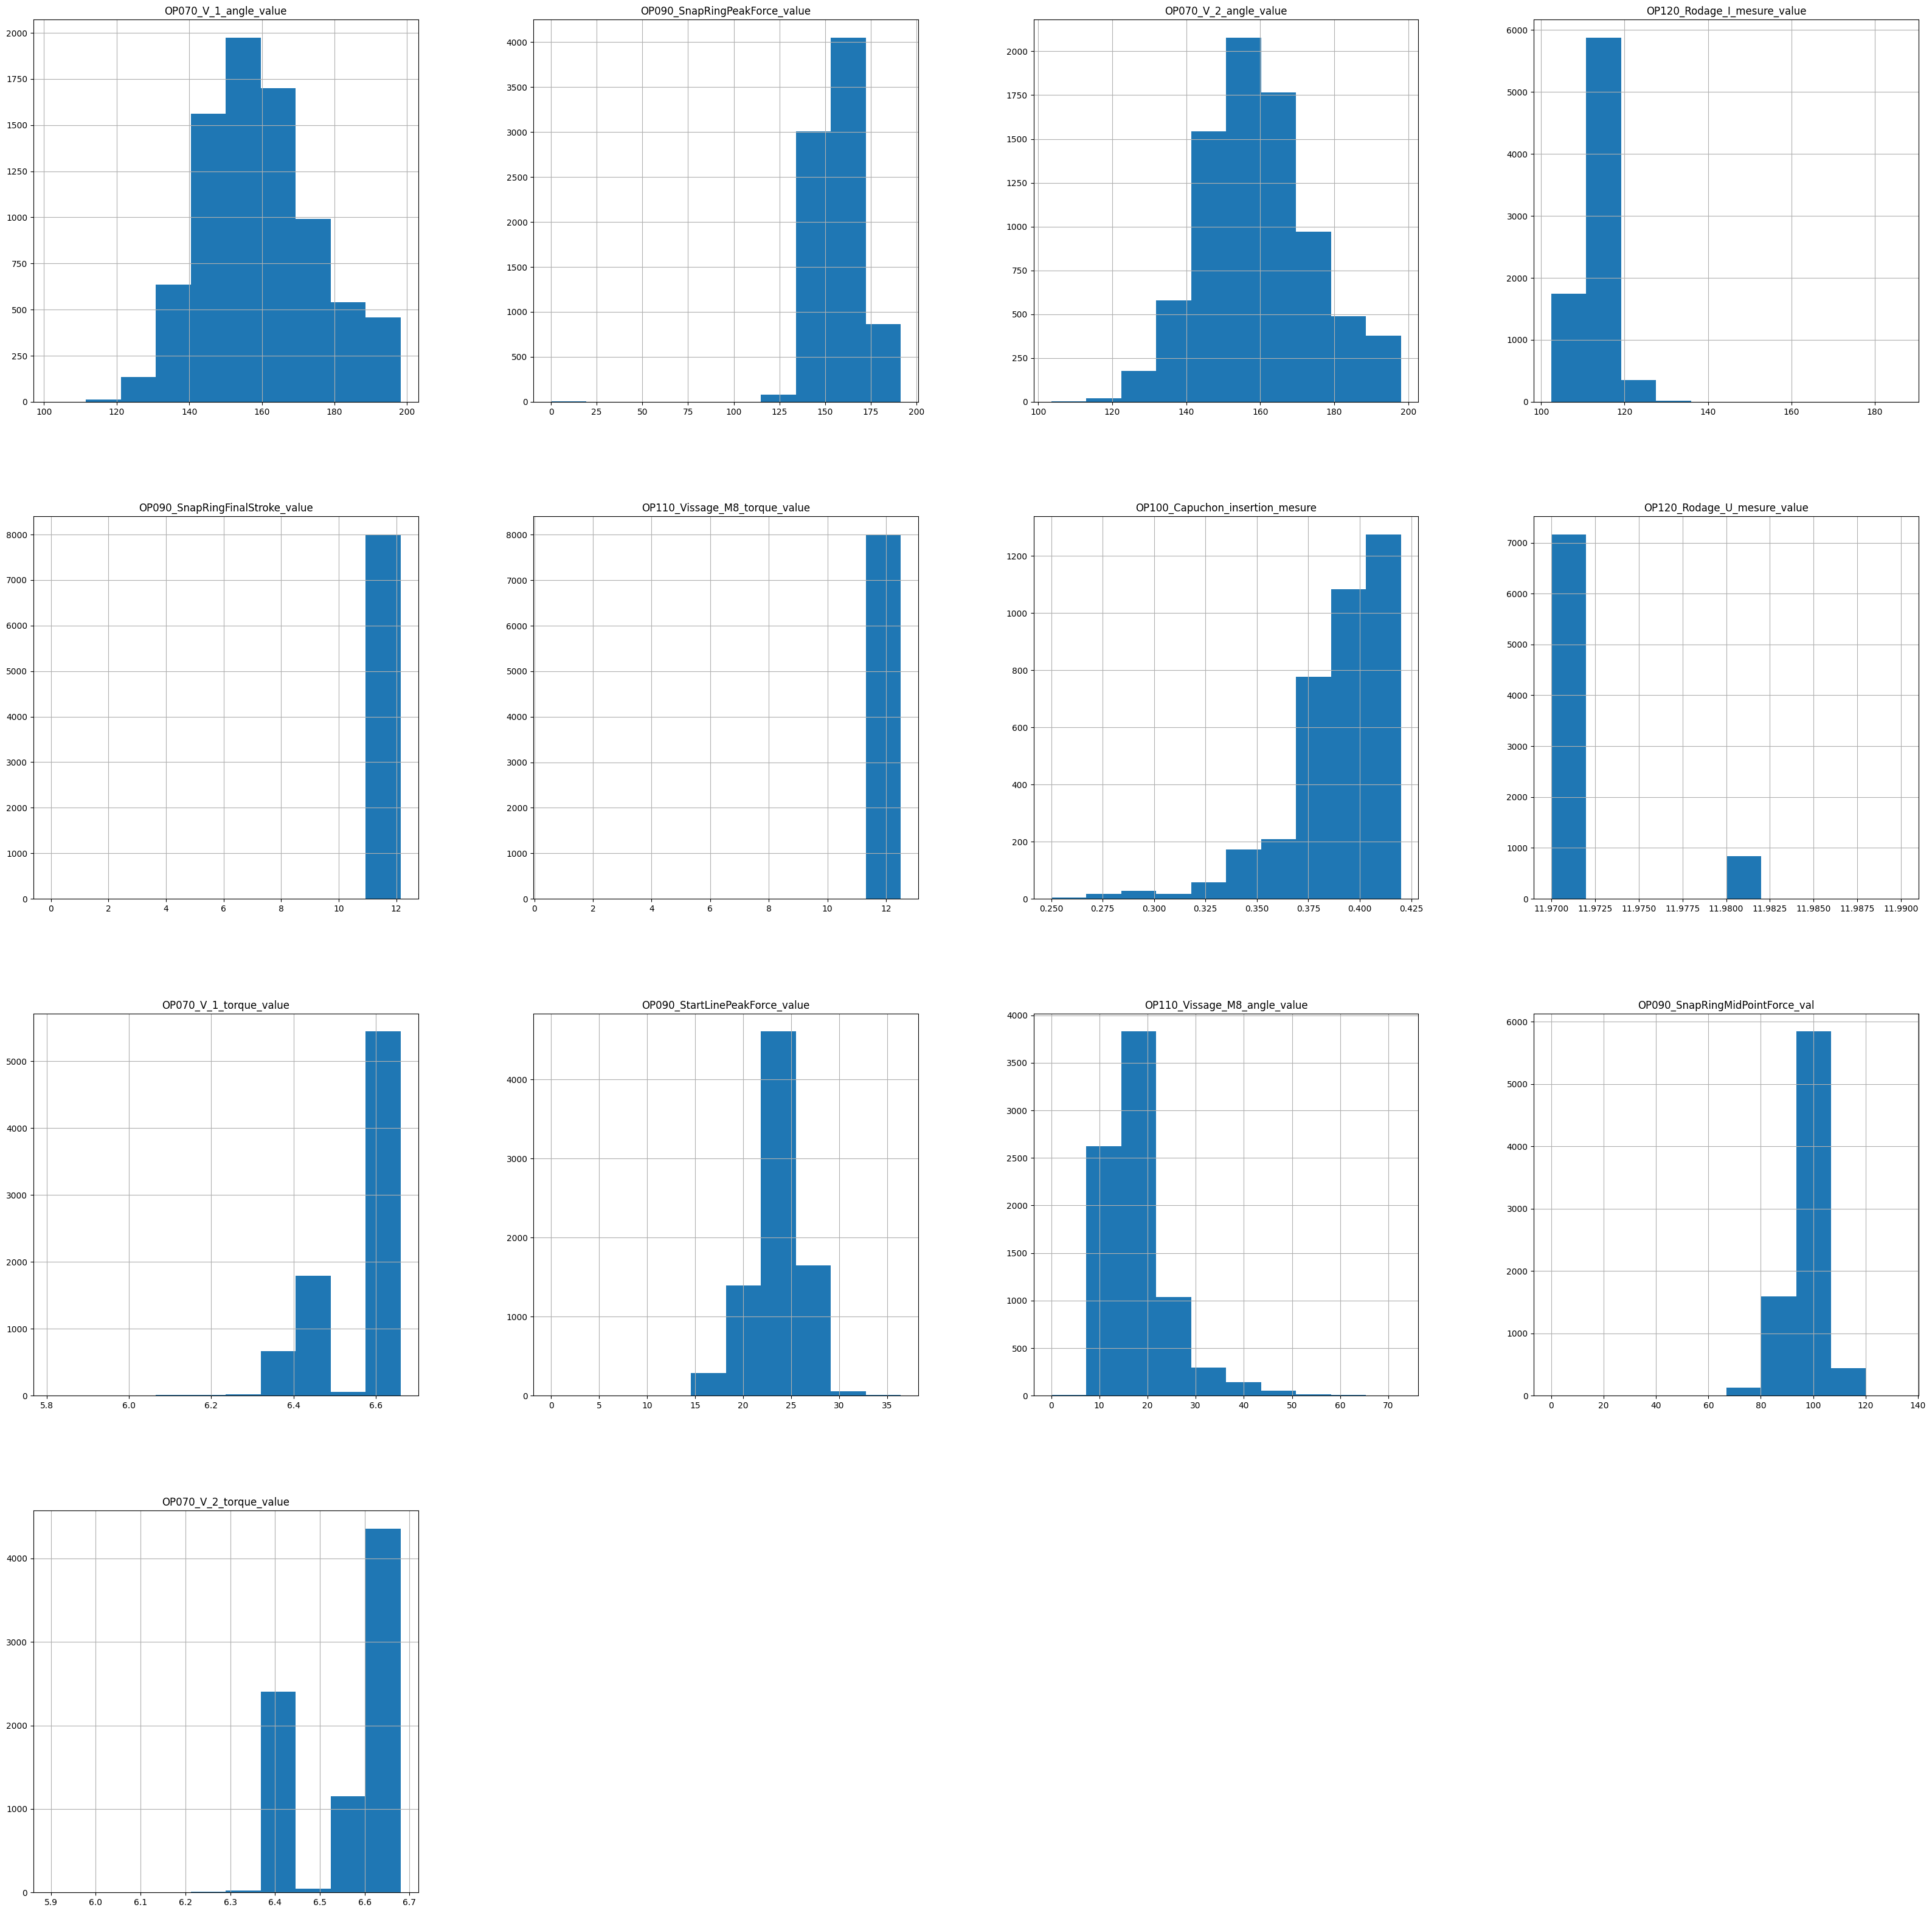

In [ ]:
df_test_inputs.hist(layout = (4 , 4), figsize = (40,40))

array([[<Axes: title={'center': 'OP070_V_1_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingPeakForce_value'}>,
        <Axes: title={'center': 'OP070_V_2_angle_value'}>,
        <Axes: title={'center': 'OP120_Rodage_I_mesure_value'}>],
       [<Axes: title={'center': 'OP090_SnapRingFinalStroke_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_torque_value'}>,
        <Axes: title={'center': 'OP100_Capuchon_insertion_mesure'}>,
        <Axes: title={'center': 'OP120_Rodage_U_mesure_value'}>],
       [<Axes: title={'center': 'OP070_V_1_torque_value'}>,
        <Axes: title={'center': 'OP090_StartLinePeakForce_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingMidPointForce_val'}>],
       [<Axes: title={'center': 'OP070_V_2_torque_value'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

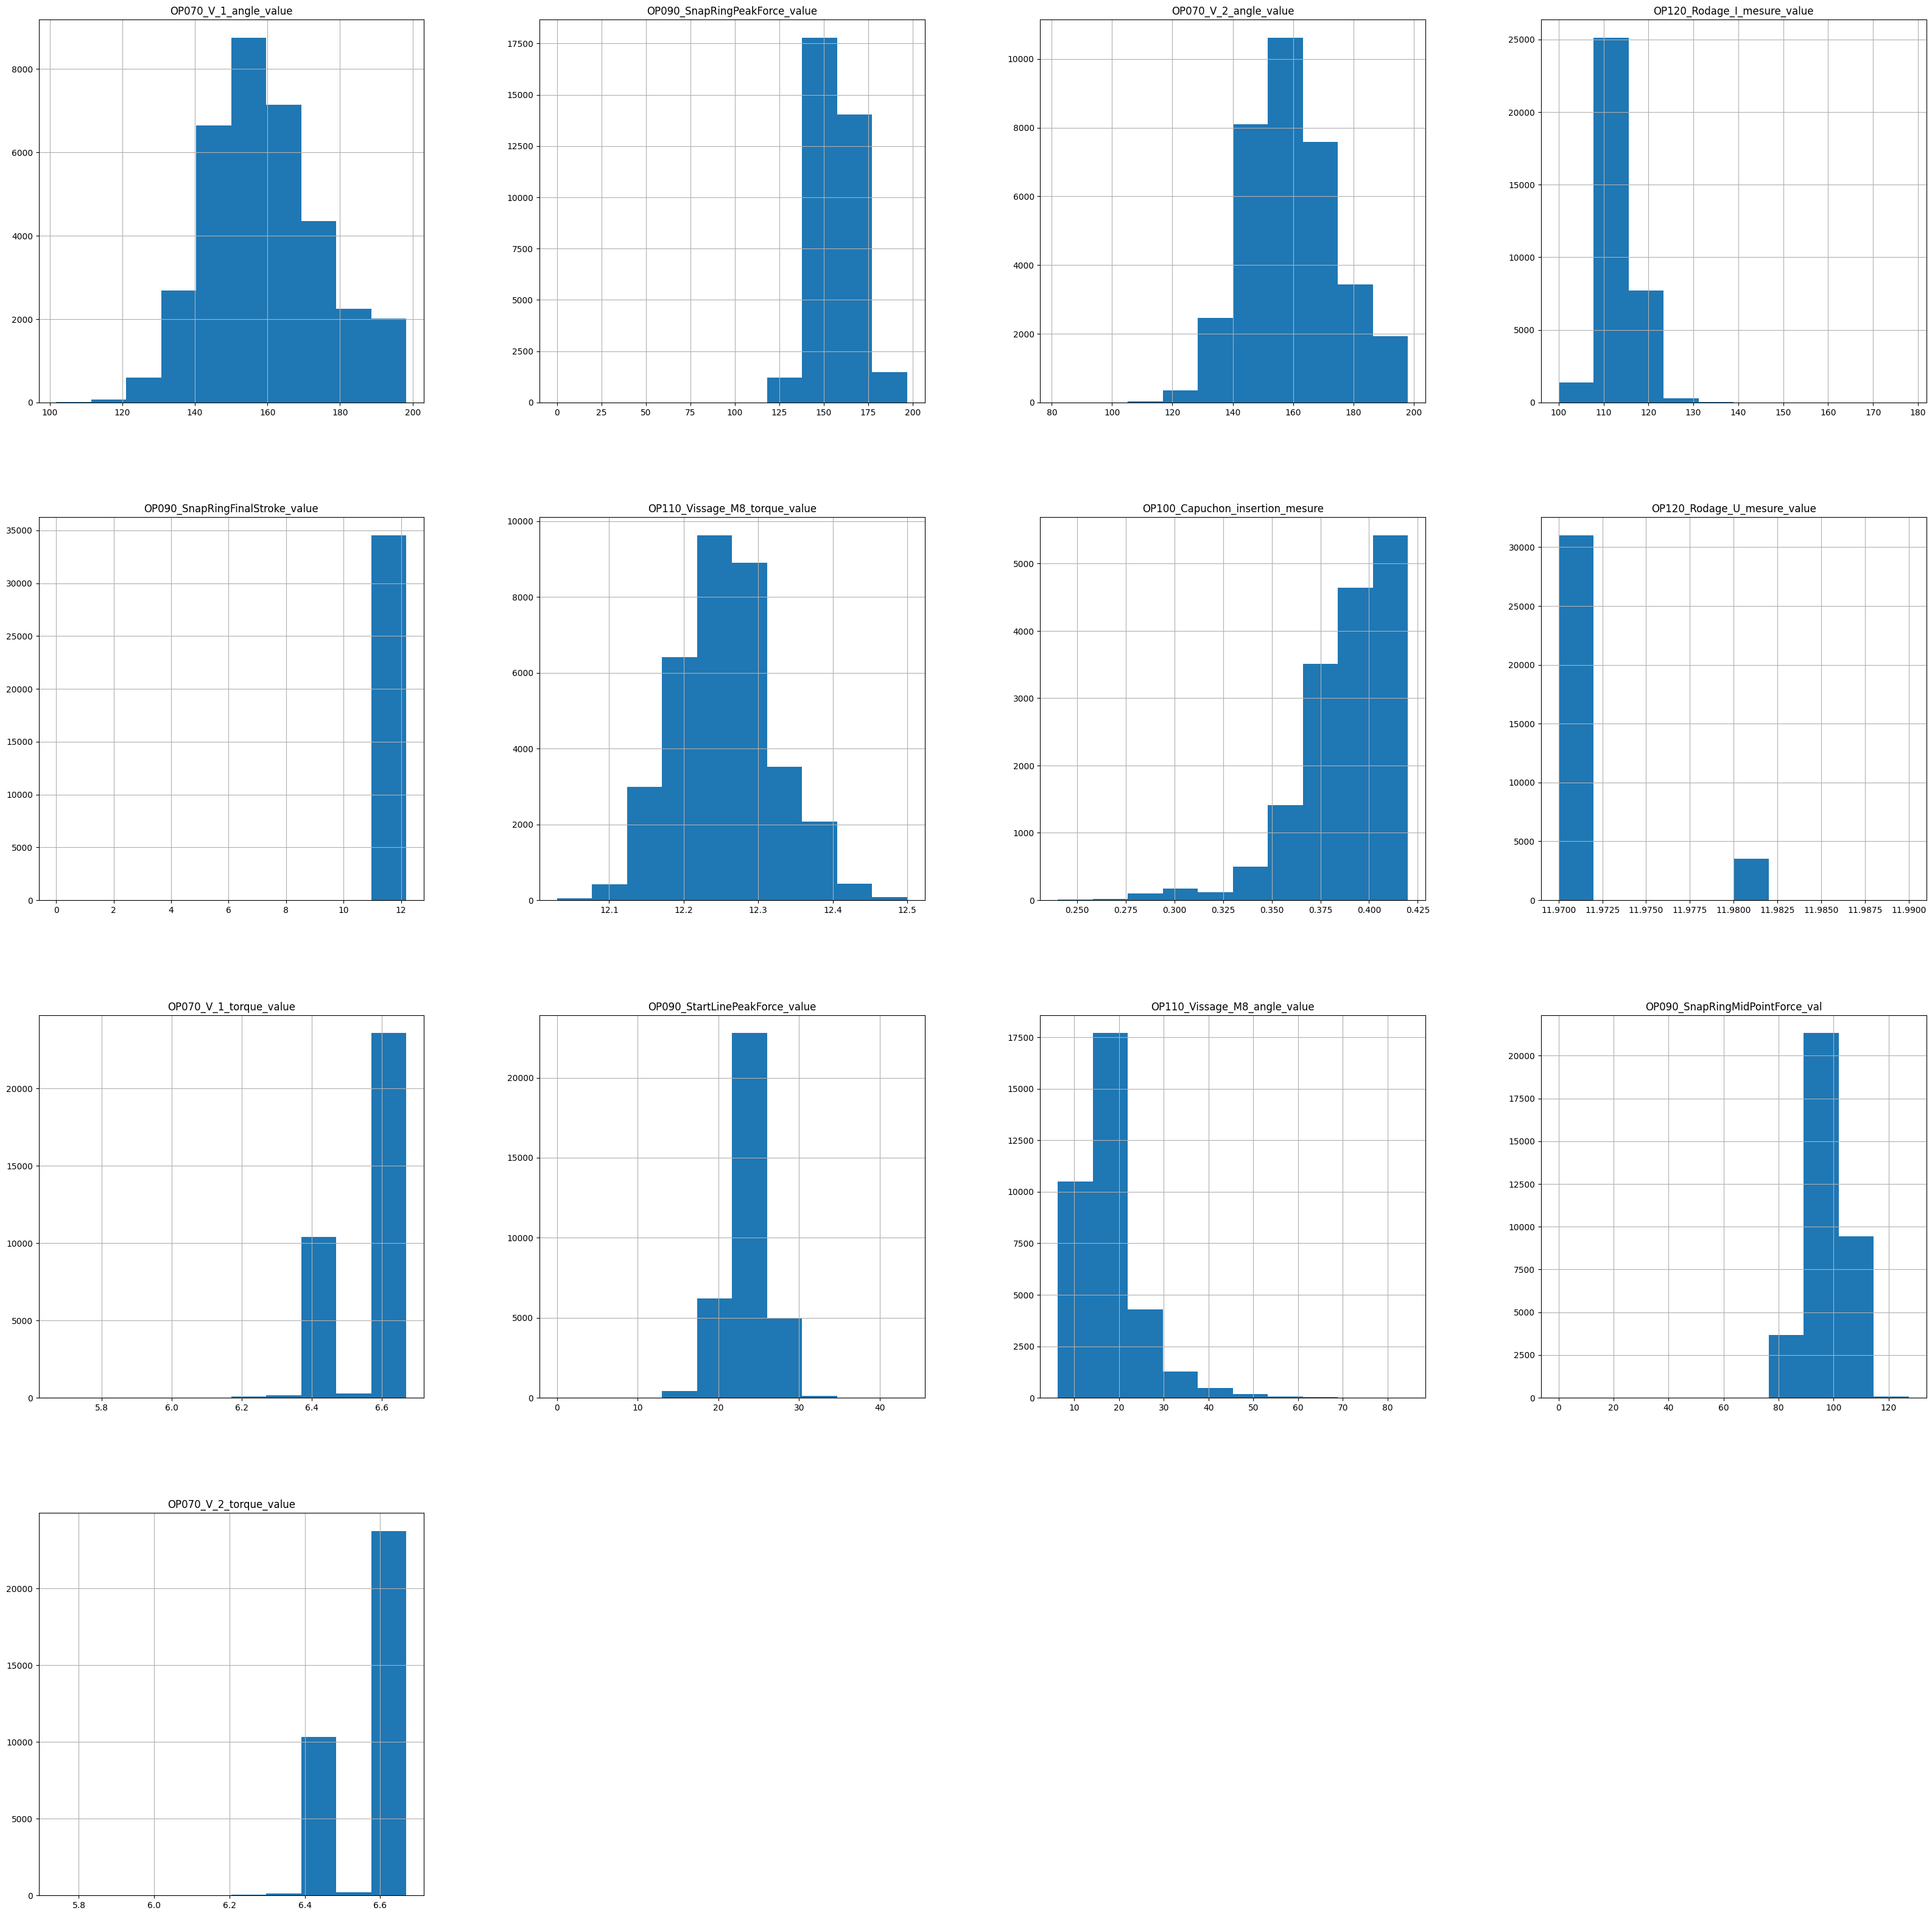

In [ ]:
df_training_inputs.hist(layout = (4 , 4), figsize = (40,40))

array([[<Axes: title={'center': 'Binar OP130_Resultat_Global_v'}>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

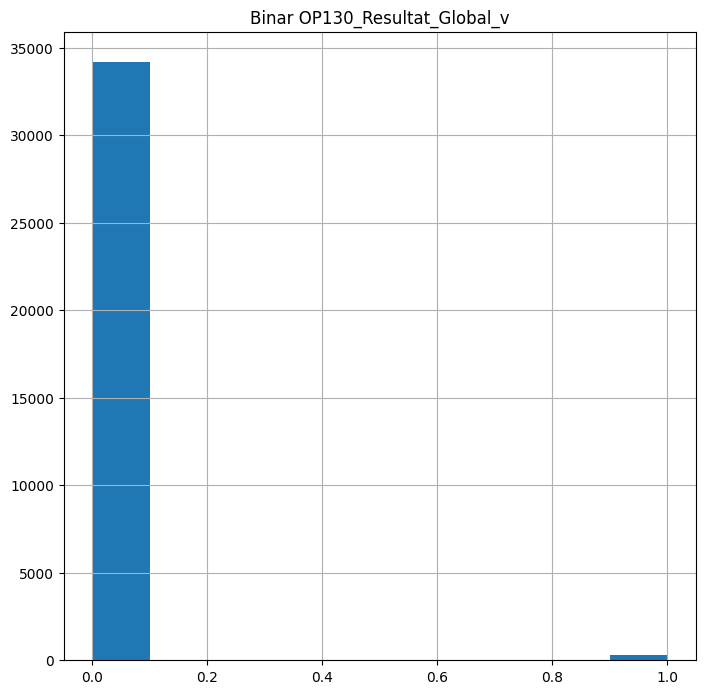

In [ ]:
df_training_output.hist(layout = (4 , 4), figsize = (40,40))

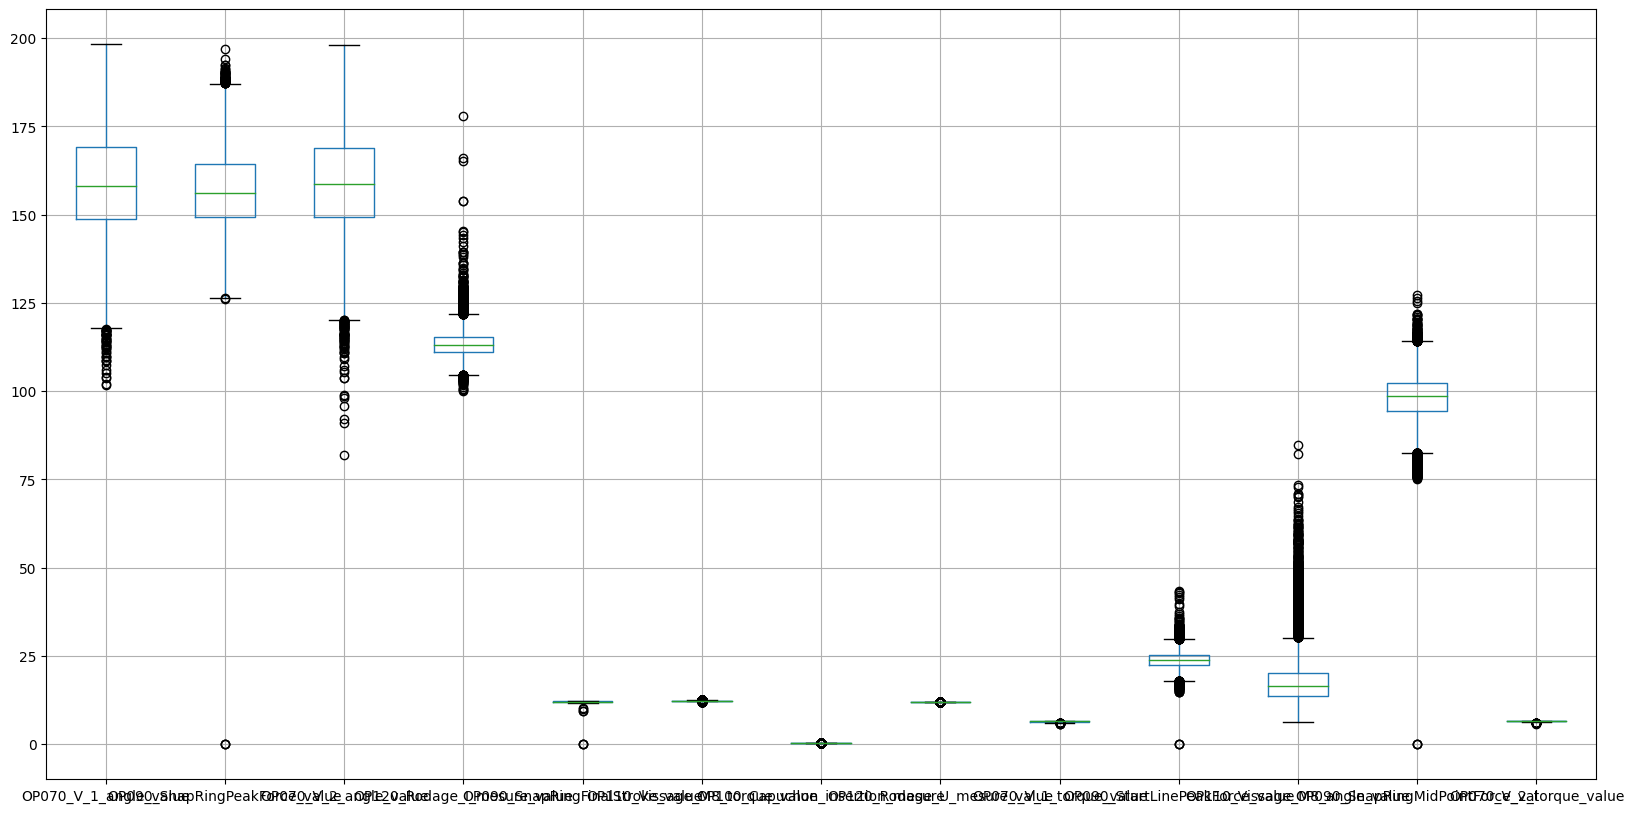

In [ ]:
bp = df_training_inputs.boxplot(figsize=(20,10))

<Axes: >

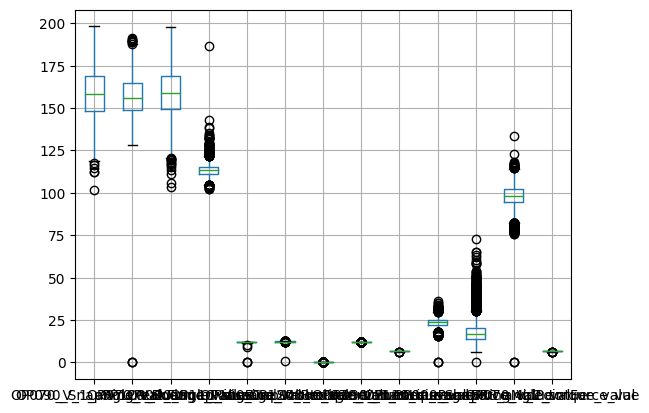

In [ ]:
df_test_inputs.boxplot()

# Transformation

## On détermine les colonnes qui ont des données manquantes

In [ ]:
df_test_inputs.columns[df_test_inputs.isnull().any()].tolist()


['OP100_Capuchon_insertion_mesure']

In [ ]:
df_training_inputs.columns[df_training_inputs.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

In [ ]:
df_training_output.columns[df_training_output.isnull().any()].tolist()

[]

In [ ]:
df_training_inputs.shape

(34515, 14)

In [ ]:
print("NaN of OP100_Capuchon_insertion_mesure in training = ", df_training_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )
print("NaN of OP100_Capuchon_insertion_mesure in test = ", df_test_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )

NaN of OP100_Capuchon_insertion_mesure in training =  18627
NaN of OP100_Capuchon_insertion_mesure in test =  4360


## On relie le dataset des données d'entrainement avec le label en sortie

In [6]:
df_training = pd.merge(df_training_inputs, df_training_output, on='PROC_TRACEINFO')

In [7]:
df_training = df_training.drop(columns=["PROC_TRACEINFO"])

<Axes: >

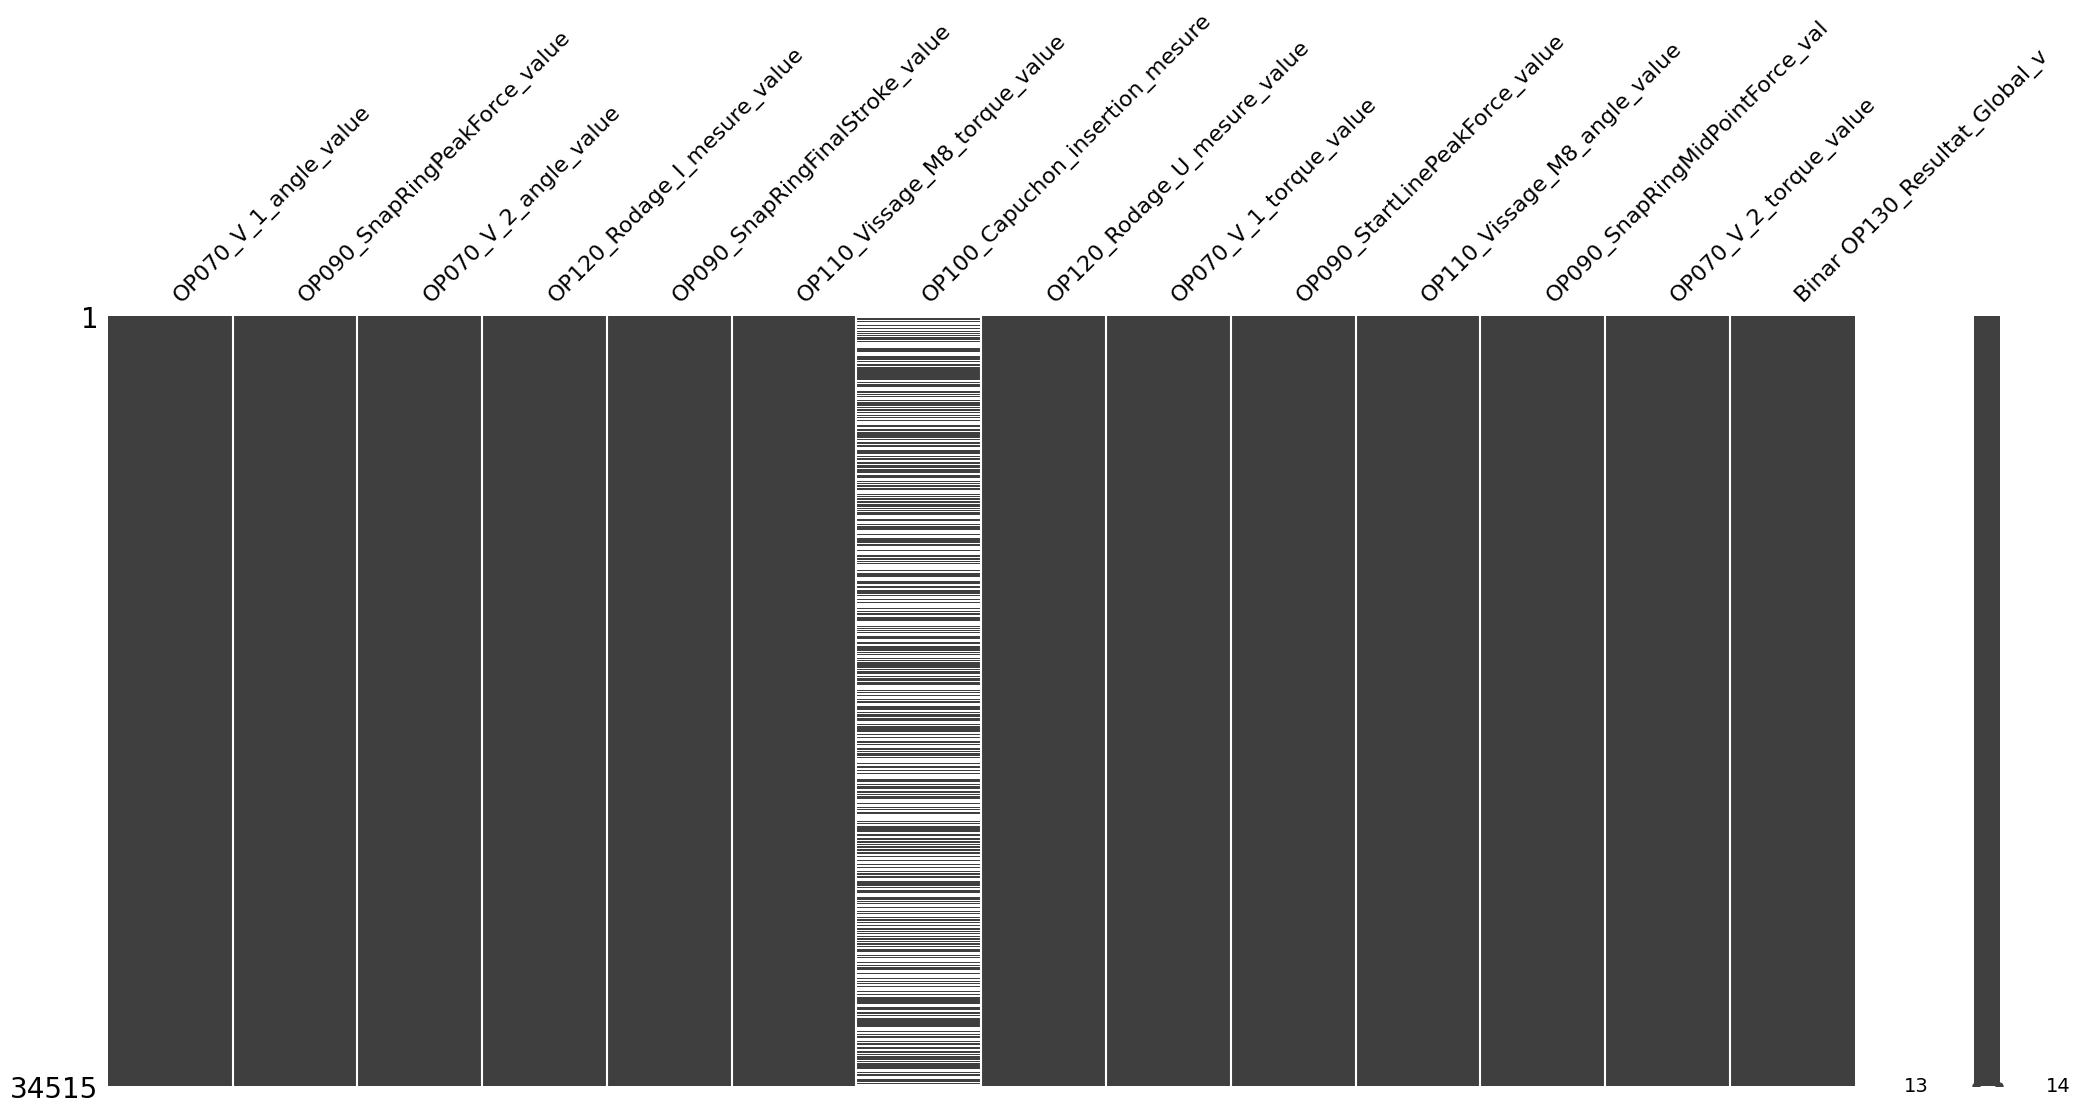

In [ ]:
msno.matrix(df_training)

### Stratégie 1 : Supprimer l'unique colonne avec des valeurs manquantes

In [8]:
df_training_cleaned = df_training.drop(columns=["OP100_Capuchon_insertion_mesure"])
df_test_inputs_cleaned = df_test_inputs.drop(columns=["OP100_Capuchon_insertion_mesure", "PROC_TRACEINFO"])

### Stratégie 2 : Supprimer les lignes avec des valeurs manquantes (on l'oublie)

In [ ]:
df_training_nonull = df_training.dropna()

### Stratégie 3: mettre des 0 aux NaN et un 1 aux valeurs mesurées (stratégie retenue)


In [38]:
df_training['OP100_Capuchon_insertion_mesure'].isna()

0         True
1        False
2         True
3        False
4         True
         ...  
34510     True
34511    False
34512     True
34513     True
34514     True
Name: OP100_Capuchon_insertion_mesure, Length: 34515, dtype: bool

In [42]:
df_training['OP100_Capuchon_insertion_mesure'][2]

nan

In [58]:
df_training_mod = df_training.copy()
for i in range(len(df_training_mod['OP100_Capuchon_insertion_mesure'])):
  if df_training_mod['OP100_Capuchon_insertion_mesure'].isna()[i] == True:
    df_training_mod['OP100_Capuchon_insertion_mesure'][i] = 0
  else:
    df_training_mod['OP100_Capuchon_insertion_mesure'][i] = 1

<ipython-input-58-62abb8fc9df1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_mod['OP100_Capuchon_insertion_mesure'][i] = 0
<ipython-input-58-62abb8fc9df1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_mod['OP100_Capuchon_insertion_mesure'][i] = 1


<Axes: >

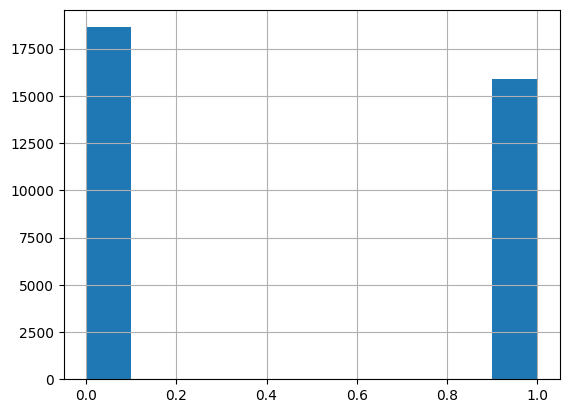

In [59]:
df_training_mod['OP100_Capuchon_insertion_mesure'].hist()

In [60]:
df_training_mod

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,180.4,190.51,173.1,113.64,12.04,12.16,0.0,11.97,6.62,26.37,18.8,109.62,6.60,0
1,138.7,147.70,163.5,109.77,12.12,12.19,1.0,11.97,6.41,21.03,18.5,105.48,6.40,0
2,180.9,150.87,181.2,109.79,11.86,12.24,0.0,11.97,6.62,25.81,17.5,100.03,6.61,0
3,173.5,159.56,151.8,113.25,11.82,12.35,1.0,11.97,6.62,24.62,15.6,104.94,6.61,0
4,174.5,172.29,177.5,112.88,12.07,12.19,0.0,11.97,6.62,29.22,33.6,99.19,6.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,158.2,168.40,180.6,110.65,11.88,12.23,0.0,11.98,6.61,24.03,14.8,98.76,6.61,0
34511,139.4,146.24,154.5,108.14,12.04,12.27,1.0,11.97,6.41,21.52,15.5,98.37,6.40,0
34512,165.5,157.34,149.8,112.77,12.09,12.17,0.0,11.97,6.62,22.65,24.4,92.92,6.62,0
34513,152.4,165.07,140.0,111.19,12.06,12.34,0.0,11.97,6.60,20.77,13.6,101.21,6.60,0


## Categorical features 


In [ ]:
df_training_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP120_Rodage_U_mesure_value      34515 non-null  float64
 7   OP070_V_1_torque_value           34515 non-null  float64
 8   OP090_StartLinePeakForce_value   34515 non-null  float64
 9   OP110_Vissage_M8_angle_value     34515 non-null  float64
 10  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 11  OP070_V_2_torque_value           34515 non-null  float64
 12  Binar OP130_Result

In [ ]:
df_training_nonull.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15888 entries, 1 to 34511
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            15888 non-null  float64
 1   OP090_SnapRingPeakForce_value    15888 non-null  float64
 2   OP070_V_2_angle_value            15888 non-null  float64
 3   OP120_Rodage_I_mesure_value      15888 non-null  float64
 4   OP090_SnapRingFinalStroke_value  15888 non-null  float64
 5   OP110_Vissage_M8_torque_value    15888 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      15888 non-null  float64
 8   OP070_V_1_torque_value           15888 non-null  float64
 9   OP090_StartLinePeakForce_value   15888 non-null  float64
 10  OP110_Vissage_M8_angle_value     15888 non-null  float64
 11  OP090_SnapRingMidPointForce_val  15888 non-null  float64
 12  OP070_V_2_torque_v

In [ ]:
df_training_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [25]:
df_training_cleaned.csv = df_training_cleaned.to_csv(path_or_buf="./df_training_cleaned.csv")

# Correlations

## scatter_matrix

### cleaned

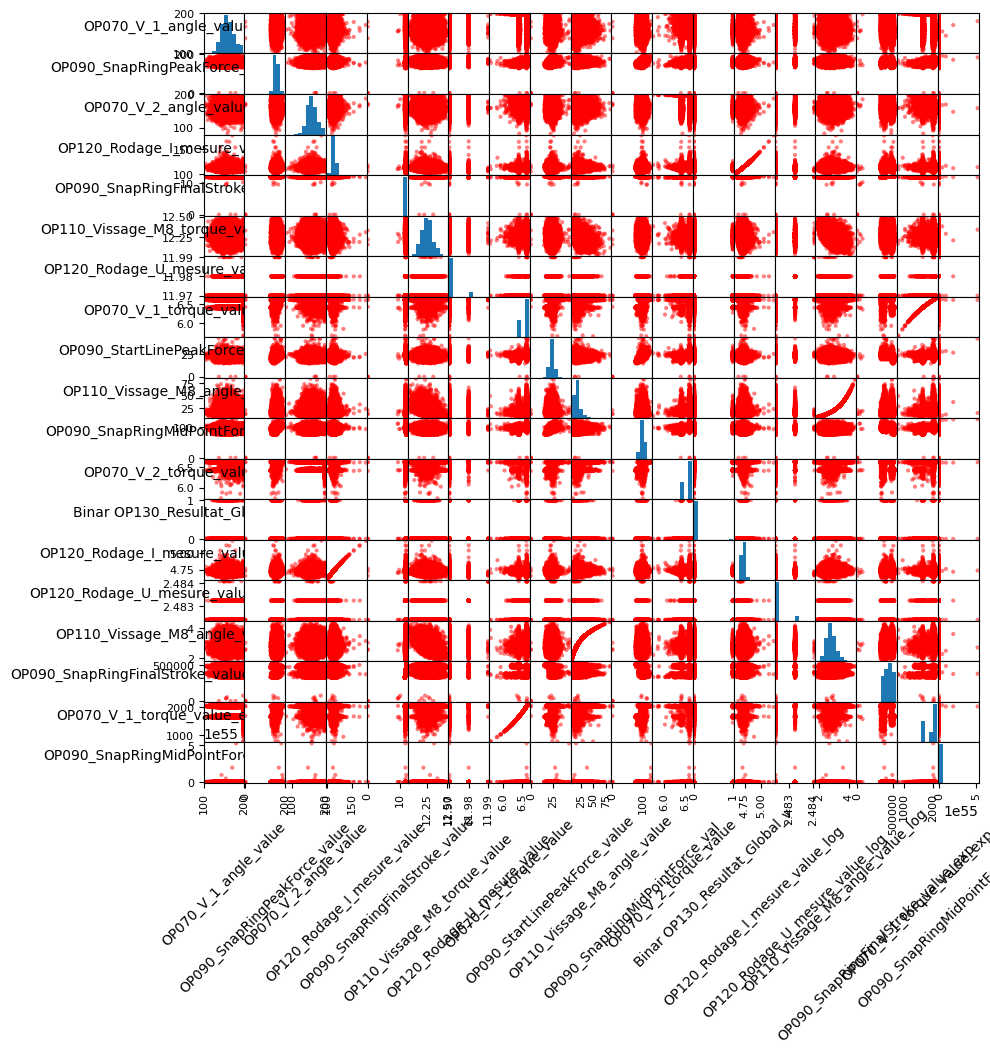

In [ ]:
sm = scatter_matrix(df_training_cleaned,
                   figsize=(10,10), color = 'red')
visualization.rotate_labels(sm)
plt.show()

In [ ]:
df_training_cleaned.columns

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'Binar OP130_Resultat_Global_v'],
      dtype='object')

In [15]:
cols_to_plot = list(df_training_cleaned.columns)
cols_to_plot

['OP070_V_1_angle_value',
 'OP090_SnapRingPeakForce_value',
 'OP070_V_2_angle_value',
 'OP120_Rodage_I_mesure_value',
 'OP090_SnapRingFinalStroke_value',
 'OP110_Vissage_M8_torque_value',
 'OP120_Rodage_U_mesure_value',
 'OP070_V_1_torque_value',
 'OP090_StartLinePeakForce_value',
 'OP110_Vissage_M8_angle_value',
 'OP090_SnapRingMidPointForce_val',
 'OP070_V_2_torque_value',
 'Binar OP130_Resultat_Global_v',
 'OP120_Rodage_I_mesure_value_log',
 'OP120_Rodage_U_mesure_value_log',
 'OP110_Vissage_M8_angle_value_log',
 'OP090_SnapRingFinalStroke_value_exp',
 'OP070_V_1_torque_value_exp',
 'OP090_SnapRingMidPointForce_val_exp']

In [9]:
cols_to_transform = ['OP120_Rodage_I_mesure_value','OP120_Rodage_U_mesure_value','OP110_Vissage_M8_angle_value','OP090_SnapRingFinalStroke_value', 'OP070_V_1_torque_value','OP090_SnapRingMidPointForce_val']

In [10]:
cols_to_transform_log = ['OP120_Rodage_I_mesure_value','OP120_Rodage_U_mesure_value','OP110_Vissage_M8_angle_value'];

cols_transformed_log = [s + "_log" for s in cols_to_transform_log]
df_training_cleaned[cols_transformed_log] = df_training_cleaned[cols_to_transform_log].transform(
                        func=lambda x : np.log(x))

In [11]:
cols_to_transform_exp = ['OP090_SnapRingFinalStroke_value', 'OP070_V_1_torque_value','OP090_SnapRingMidPointForce_val']
cols_transformed_exp = [s + "_exp" for s in cols_to_transform_exp]

df_training_cleaned[cols_transformed_exp] = df_training_cleaned[cols_to_transform_exp].transform(
    func=lambda x: np.exp(1+x))

In [12]:
cols_transformed = cols_transformed_log + cols_transformed_exp
cols_transformed

['OP120_Rodage_I_mesure_value_log',
 'OP120_Rodage_U_mesure_value_log',
 'OP110_Vissage_M8_angle_value_log',
 'OP090_SnapRingFinalStroke_value_exp',
 'OP070_V_1_torque_value_exp',
 'OP090_SnapRingMidPointForce_val_exp']

In [ ]:
df_training_cleaned.columns

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'Binar OP130_Resultat_Global_v', 'OP120_Rodage_I_mesure_value_log',
       'OP120_Rodage_U_mesure_value_log', 'OP110_Vissage_M8_angle_value_log',
       'OP090_SnapRingFinalStroke_value_exp', 'OP070_V_1_torque_value_exp',
       'OP090_SnapRingMidPointForce_val_exp'],
      dtype='object')



Let's print again the scattermatrix, replacing the original features with the transformed ones.


In [13]:
df_training_cleaned_transf = df_training_cleaned.copy()

In [ ]:
for feature in cols_to_transform:
    cols_to_plot.remove(feature)
list(cols_to_plot)

['OP070_V_1_angle_value',
 'OP090_SnapRingPeakForce_value',
 'OP070_V_2_angle_value',
 'OP110_Vissage_M8_torque_value',
 'OP090_StartLinePeakForce_value',
 'OP070_V_2_torque_value',
 'Binar OP130_Resultat_Global_v']

In [ ]:
for feature in cols_transformed:
    cols_to_plot.insert(0,feature)

list(cols_to_plot)

['OP090_SnapRingMidPointForce_val_exp',
 'OP070_V_1_torque_value_exp',
 'OP090_SnapRingFinalStroke_value_exp',
 'OP110_Vissage_M8_angle_value_log',
 'OP120_Rodage_U_mesure_value_log',
 'OP120_Rodage_I_mesure_value_log',
 'OP070_V_1_angle_value',
 'OP090_SnapRingPeakForce_value',
 'OP070_V_2_angle_value',
 'OP110_Vissage_M8_torque_value',
 'OP090_StartLinePeakForce_value',
 'OP070_V_2_torque_value',
 'Binar OP130_Resultat_Global_v']

In [16]:
df_training_cleaned_transf[cols_to_plot]

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,OP120_Rodage_I_mesure_value_log,OP120_Rodage_U_mesure_value_log,OP110_Vissage_M8_angle_value_log,OP090_SnapRingFinalStroke_value_exp,OP070_V_1_torque_value_exp,OP090_SnapRingMidPointForce_val_exp
0,180.4,190.51,173.1,113.64,12.04,12.16,11.97,6.62,26.37,18.8,109.62,6.60,0,4.733036,2.482404,2.933857,460468.625050,2038.562130,1.100666e+48
1,138.7,147.70,163.5,109.77,12.12,12.19,11.97,6.41,21.03,18.5,105.48,6.40,0,4.698387,2.482404,2.917771,498819.706587,1652.426347,1.752574e+46
2,180.9,150.87,181.2,109.79,11.86,12.24,11.97,6.62,25.81,17.5,100.03,6.61,0,4.698569,2.482404,2.862201,384615.725794,2038.562130,7.529593e+43
3,173.5,159.56,151.8,113.25,11.82,12.35,11.97,6.62,24.62,15.6,104.94,6.61,0,4.729598,2.482404,2.747271,369534.727474,2038.562130,1.021310e+46
4,174.5,172.29,177.5,112.88,12.07,12.19,11.97,6.62,29.22,33.6,99.19,6.61,0,4.726325,2.482404,3.514526,474491.982426,2038.562130,3.250605e+43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,158.2,168.40,180.6,110.65,11.88,12.23,11.98,6.61,24.03,14.8,98.76,6.61,0,4.706372,2.483239,2.694627,392385.478850,2018.278098,2.114548e+43
34511,139.4,146.24,154.5,108.14,12.04,12.27,11.97,6.41,21.52,15.5,98.37,6.40,0,4.683427,2.482404,2.740840,460468.625050,1652.426347,1.431669e+43
34512,165.5,157.34,149.8,112.77,12.09,12.17,11.97,6.62,22.65,24.4,92.92,6.62,0,4.725350,2.482404,3.194583,484077.356303,2038.562130,6.150887e+40
34513,152.4,165.07,140.0,111.19,12.06,12.34,11.97,6.60,20.77,13.6,101.21,6.60,0,4.711240,2.482404,2.610070,469770.708316,1998.195895,2.450411e+44


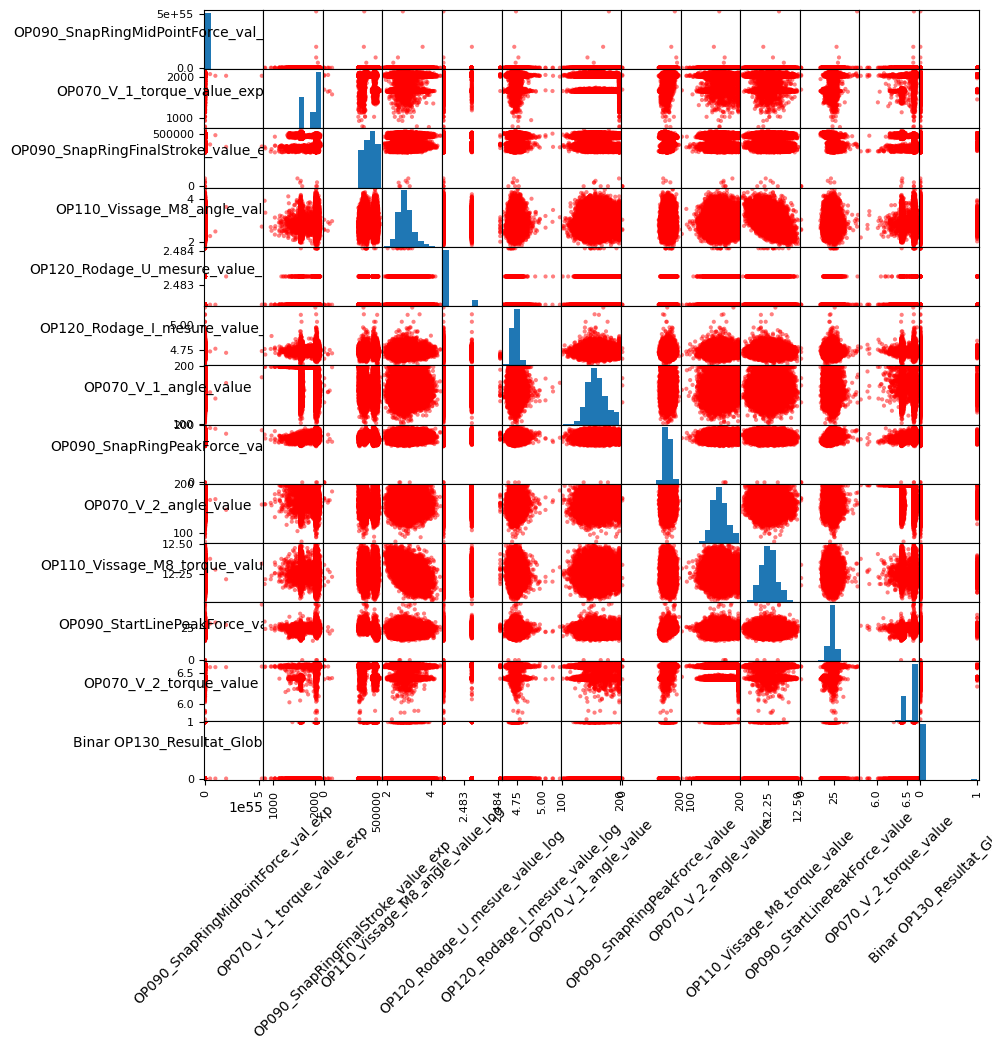

In [ ]:
sm = scatter_matrix(df_training_cleaned_transf[cols_to_plot],
                   figsize=(10,10), color = 'red')
visualization.rotate_labels(sm)

plt.show()

### nonull

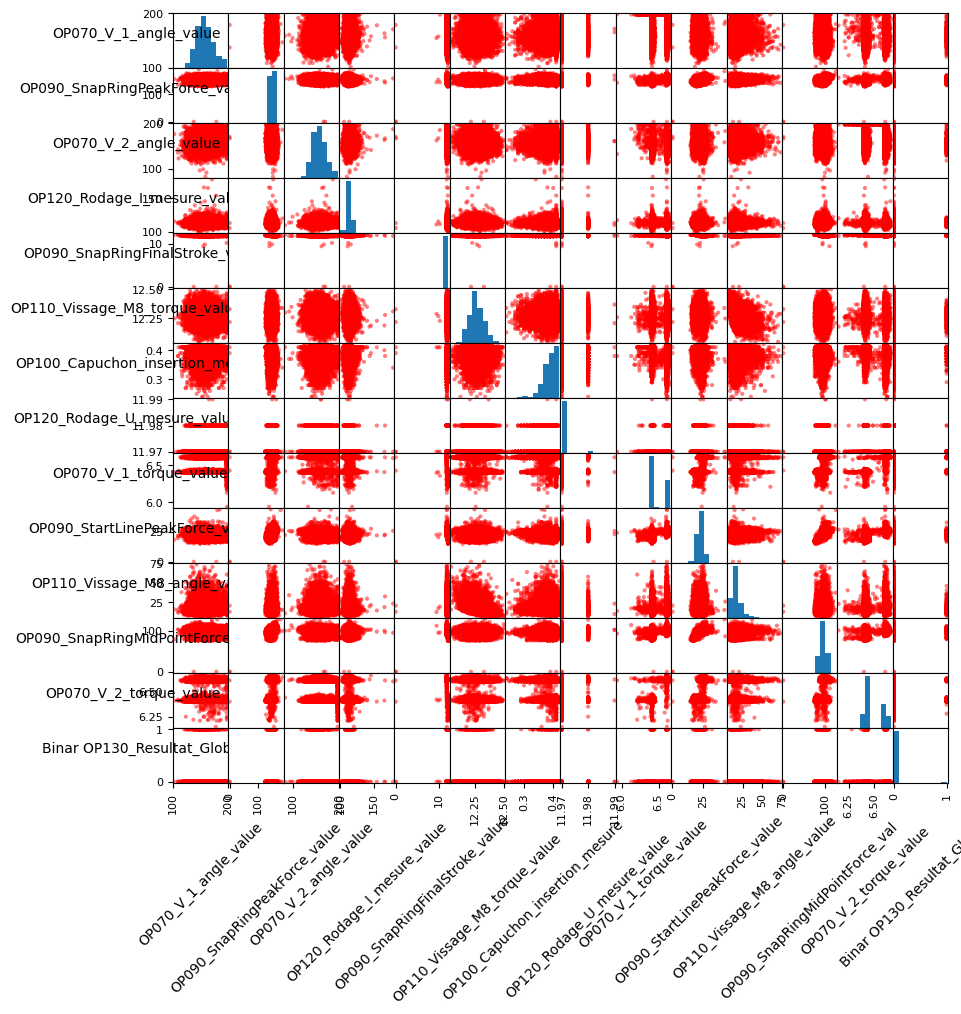

In [ ]:
sm = scatter_matrix(df_training_nonull,
                   figsize=(10,10), color='red')
visualization.rotate_labels(sm)
plt.show()


### mod


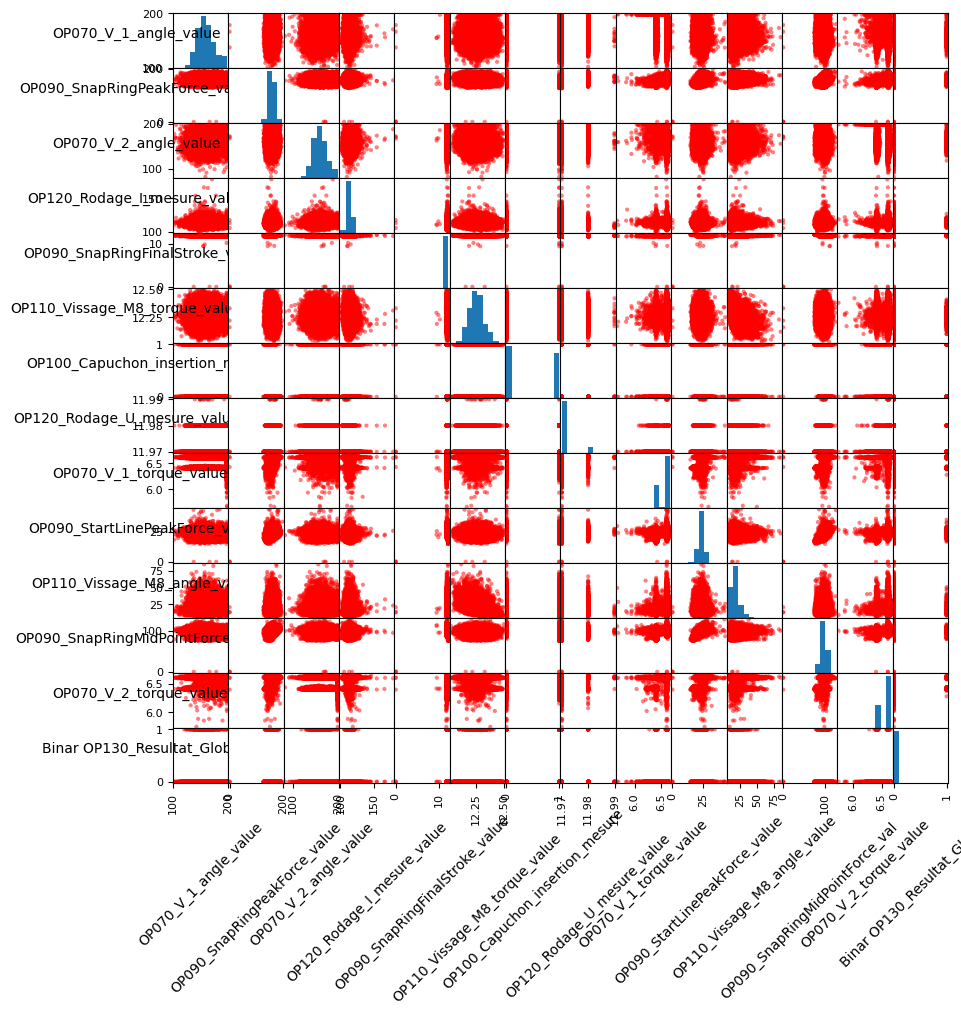

In [61]:
sm = scatter_matrix(df_training_mod,
                   figsize=(10,10), color='red')
visualization.rotate_labels(sm)
plt.show()



## Pearson's correlation


### Cleaned

In [ ]:
corrmatrix = df_training_cleaned.corr()
corrmatrix

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,OP120_Rodage_I_mesure_value_log,OP120_Rodage_U_mesure_value_log,OP110_Vissage_M8_angle_value_log,OP090_SnapRingFinalStroke_value_exp,OP070_V_1_torque_value_exp,OP090_SnapRingMidPointForce_val_exp
OP070_V_1_angle_value,1.000000,0.008887,0.186781,0.035003,-0.087910,-0.017578,-0.007284,-0.012960,0.057592,0.014374,0.066924,0.073814,-0.012793,0.035691,-0.007284,0.021449,-0.112748,-0.008670,0.006571
OP090_SnapRingPeakForce_value,0.008887,1.000000,0.038399,0.055235,0.076451,-0.134780,0.135288,0.489633,0.336620,0.106753,0.345139,0.481550,-0.007290,0.055811,0.135288,0.107327,-0.012354,0.493920,0.016969
OP070_V_2_angle_value,0.186781,0.038399,1.000000,0.036301,-0.060931,-0.030284,0.003245,0.059178,0.047190,0.017727,0.050193,0.017812,-0.006342,0.036739,0.003245,0.023336,-0.073238,0.060928,-0.001091
OP120_Rodage_I_mesure_value,0.035003,0.055235,0.036301,1.000000,0.060014,-0.046313,-0.118751,0.034240,0.002962,0.025043,0.046556,0.034342,0.003763,0.999116,-0.118750,0.027576,0.076714,0.035290,0.001124
OP090_SnapRingFinalStroke_value,-0.087910,0.076451,-0.060931,0.060014,1.000000,-0.095903,-0.022536,-0.380948,-0.381450,0.022764,-0.081412,-0.407915,0.015148,0.061410,-0.022536,0.031721,0.795896,-0.384514,-0.004999
OP110_Vissage_M8_torque_value,-0.017578,-0.134780,-0.030284,-0.046313,-0.095903,1.000000,-0.031115,-0.076357,0.009997,-0.445953,-0.057760,-0.073071,-0.002984,-0.047169,-0.031115,-0.515324,-0.128840,-0.077451,0.006364
OP120_Rodage_U_mesure_value,-0.007284,0.135288,0.003245,-0.118751,-0.022536,-0.031115,1.000000,0.169246,0.087487,0.013814,0.057027,0.172109,-0.010492,-0.121035,1.000000,0.014373,-0.038234,0.171083,0.003261
OP070_V_1_torque_value,-0.012960,0.489633,0.059178,0.034240,-0.380948,-0.076357,0.169246,1.000000,0.543089,0.112377,0.334814,0.896698,-0.037438,0.034066,0.169247,0.104669,-0.522609,0.999134,0.005319
OP090_StartLinePeakForce_value,0.057592,0.336620,0.047190,0.002962,-0.381450,0.009997,0.087487,0.543089,1.000000,0.043943,0.620728,0.562435,0.010720,0.002355,0.087487,0.037062,-0.592980,0.547703,0.042606
OP110_Vissage_M8_angle_value,0.014374,0.106753,0.017727,0.025043,0.022764,-0.445953,0.013814,0.112377,0.043943,1.000000,0.073582,0.113109,0.005470,0.025347,0.013814,0.964817,0.026249,0.113750,0.001769


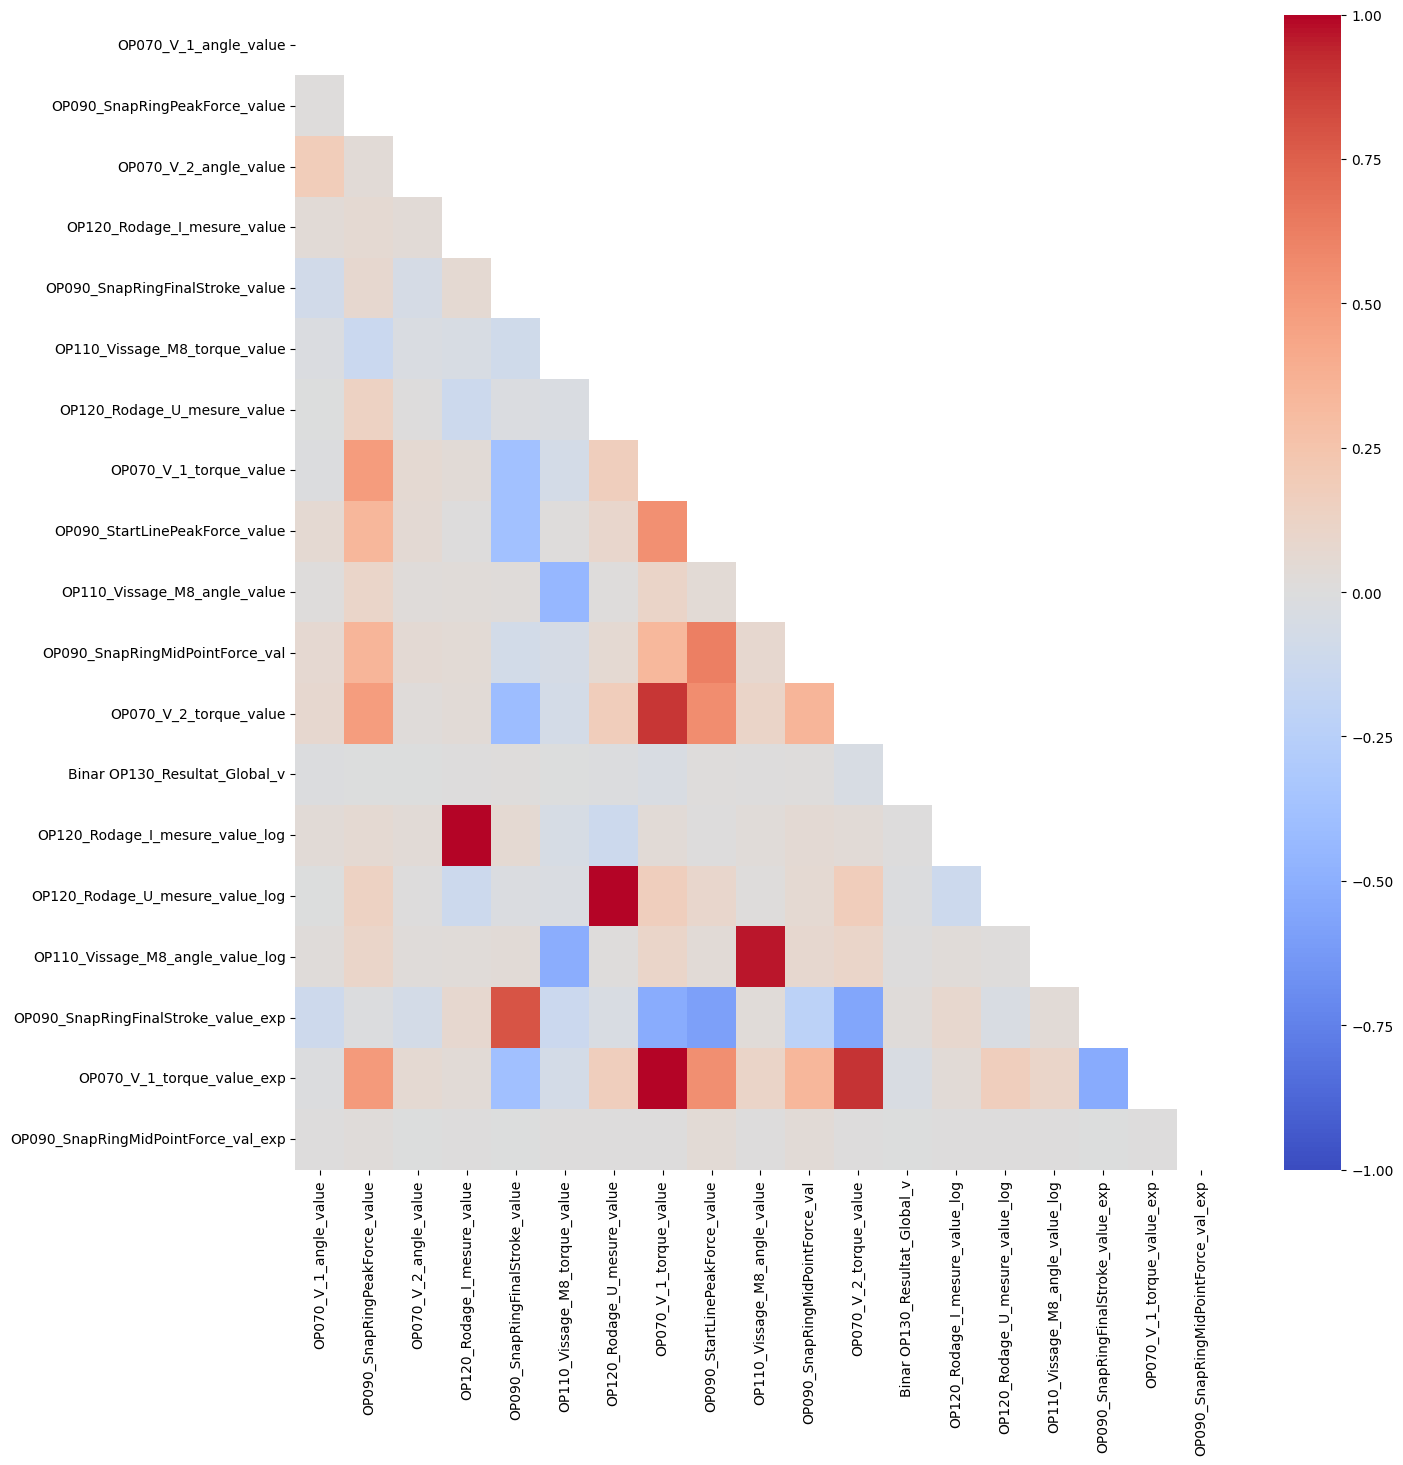

In [ ]:
visualization.plot_corr(df_training_cleaned, width=15, height=15, 
                        print_value=False)

In [17]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_cleaned, target_feature='Binar OP130_Resultat_Global_v')

features_corr[:12]

Binar OP130_Resultat_Global_v          1.00
OP070_V_1_torque_value_exp            -0.04
OP070_V_1_torque_value                -0.04
OP070_V_2_torque_value                -0.04
OP090_SnapRingFinalStroke_value_exp    0.02
OP090_SnapRingFinalStroke_value        0.02
OP070_V_1_angle_value                 -0.01
OP090_SnapRingMidPointForce_val        0.01
OP110_Vissage_M8_angle_value_log       0.01
OP120_Rodage_U_mesure_value_log       -0.01
OP110_Vissage_M8_angle_value           0.01
OP090_SnapRingPeakForce_value         -0.01
Name: Binar OP130_Resultat_Global_v, dtype: float64

In [ ]:
val = df_training_cleaned['Binar OP130_Resultat_Global_v'].values
np.count_nonzero(val == 1)

305

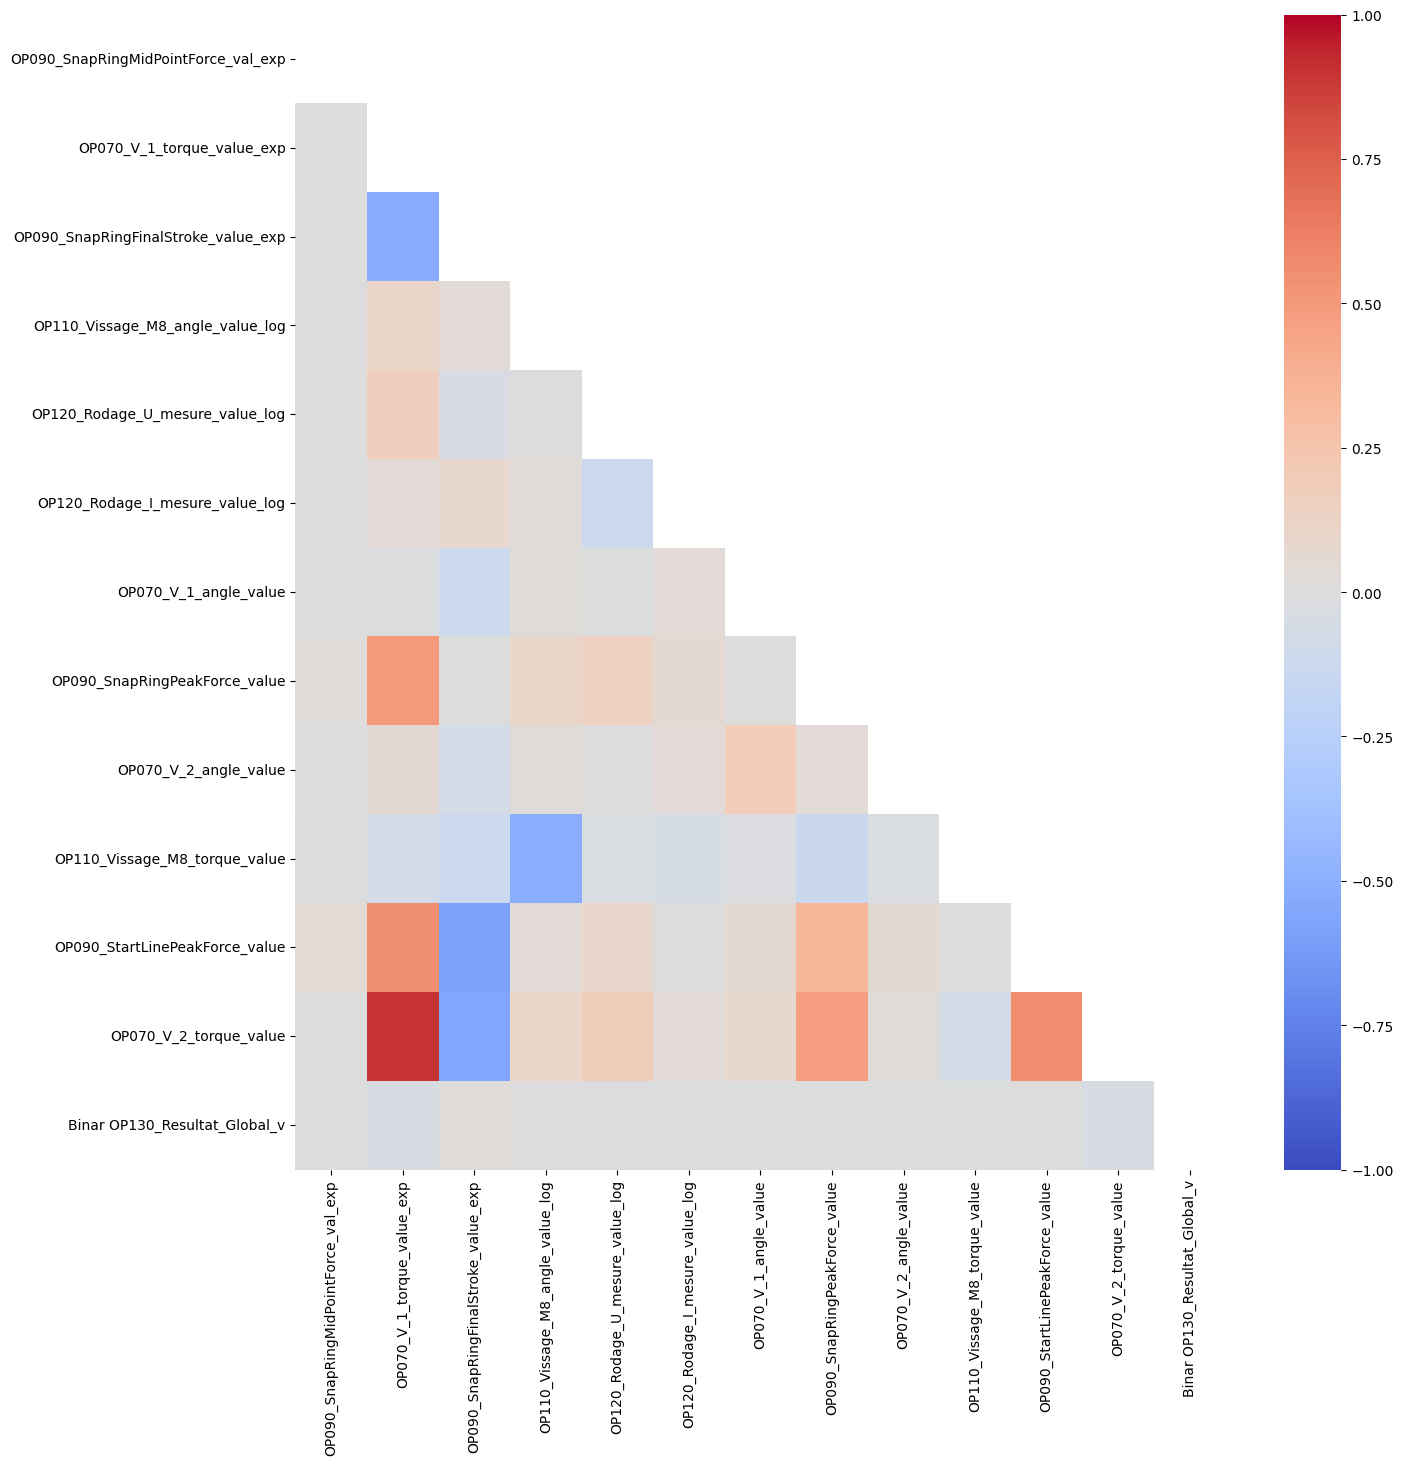

In [ ]:
visualization.plot_corr(df_training_cleaned_transf[cols_to_plot], width=15, height=15, 
                        print_value=False)

In [18]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_cleaned_transf[cols_to_plot], target_feature='Binar OP130_Resultat_Global_v')

features_corr[:12]

Binar OP130_Resultat_Global_v          1.00
OP070_V_1_torque_value_exp            -0.04
OP070_V_1_torque_value                -0.04
OP070_V_2_torque_value                -0.04
OP090_SnapRingFinalStroke_value_exp    0.02
OP090_SnapRingFinalStroke_value        0.02
OP070_V_1_angle_value                 -0.01
OP090_SnapRingMidPointForce_val        0.01
OP110_Vissage_M8_angle_value_log       0.01
OP120_Rodage_U_mesure_value_log       -0.01
OP110_Vissage_M8_angle_value           0.01
OP090_SnapRingPeakForce_value         -0.01
Name: Binar OP130_Resultat_Global_v, dtype: float64

In [24]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_cleaned_transf[cols_to_plot], target_feature='OP070_V_2_torque_value')

features_corr[:12]

OP070_V_2_torque_value                 1.00
OP070_V_1_torque_value_exp             0.90
OP070_V_1_torque_value                 0.90
OP090_SnapRingFinalStroke_value_exp   -0.56
OP090_StartLinePeakForce_value         0.56
OP090_SnapRingPeakForce_value          0.48
OP090_SnapRingFinalStroke_value       -0.41
OP090_SnapRingMidPointForce_val        0.35
OP120_Rodage_U_mesure_value_log        0.17
OP120_Rodage_U_mesure_value            0.17
OP110_Vissage_M8_angle_value           0.11
OP110_Vissage_M8_angle_value_log       0.11
Name: OP070_V_2_torque_value, dtype: float64

### nonnull

In [ ]:
corrmatrix = df_training_nonull.corr()
corrmatrix

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
OP070_V_1_angle_value,1.000000,0.017731,0.206809,0.015439,-0.055870,-0.046554,-0.024779,-0.007551,0.025981,0.020144,0.031252,-0.004953,0.067972,0.000075
OP090_SnapRingPeakForce_value,0.017731,1.000000,-0.020173,0.005835,-0.096732,-0.009387,-0.193211,0.041993,0.349438,0.357971,0.066512,0.286376,0.349925,0.001748
OP070_V_2_angle_value,0.206809,-0.020173,1.000000,0.019047,-0.019488,-0.048310,0.005722,-0.004269,-0.009474,-0.011685,0.024902,-0.022472,-0.020695,-0.008721
OP120_Rodage_I_mesure_value,0.015439,0.005835,0.019047,1.000000,0.017408,-0.008639,0.053972,-0.031949,-0.015440,0.012944,-0.008336,0.015603,-0.015335,0.003798
OP090_SnapRingFinalStroke_value,-0.055870,-0.096732,-0.019488,0.017408,1.000000,0.000402,0.307973,-0.090466,-0.643631,-0.427980,-0.119204,-0.199176,-0.648122,0.014889
OP110_Vissage_M8_torque_value,-0.046554,-0.009387,-0.048310,-0.008639,0.000402,1.000000,-0.023820,0.001635,-0.003357,0.012750,-0.410296,0.007834,-0.003253,-0.007228
OP100_Capuchon_insertion_mesure,-0.024779,-0.193211,0.005722,0.053972,0.307973,-0.023820,1.000000,-0.087928,-0.522733,-0.209883,-0.094913,0.016094,-0.532577,0.032212
OP120_Rodage_U_mesure_value,-0.007551,0.041993,-0.004269,-0.031949,-0.090466,0.001635,-0.087928,1.000000,0.133145,0.098468,0.003058,0.048902,0.134290,-0.016968
OP070_V_1_torque_value,0.025981,0.349438,-0.009474,-0.015440,-0.643631,-0.003357,-0.522733,0.133145,1.000000,0.642305,0.181338,0.331653,0.961706,-0.029617
OP090_StartLinePeakForce_value,0.020144,0.357971,-0.011685,0.012944,-0.427980,0.012750,-0.209883,0.098468,0.642305,1.000000,0.106103,0.738526,0.643899,0.018142


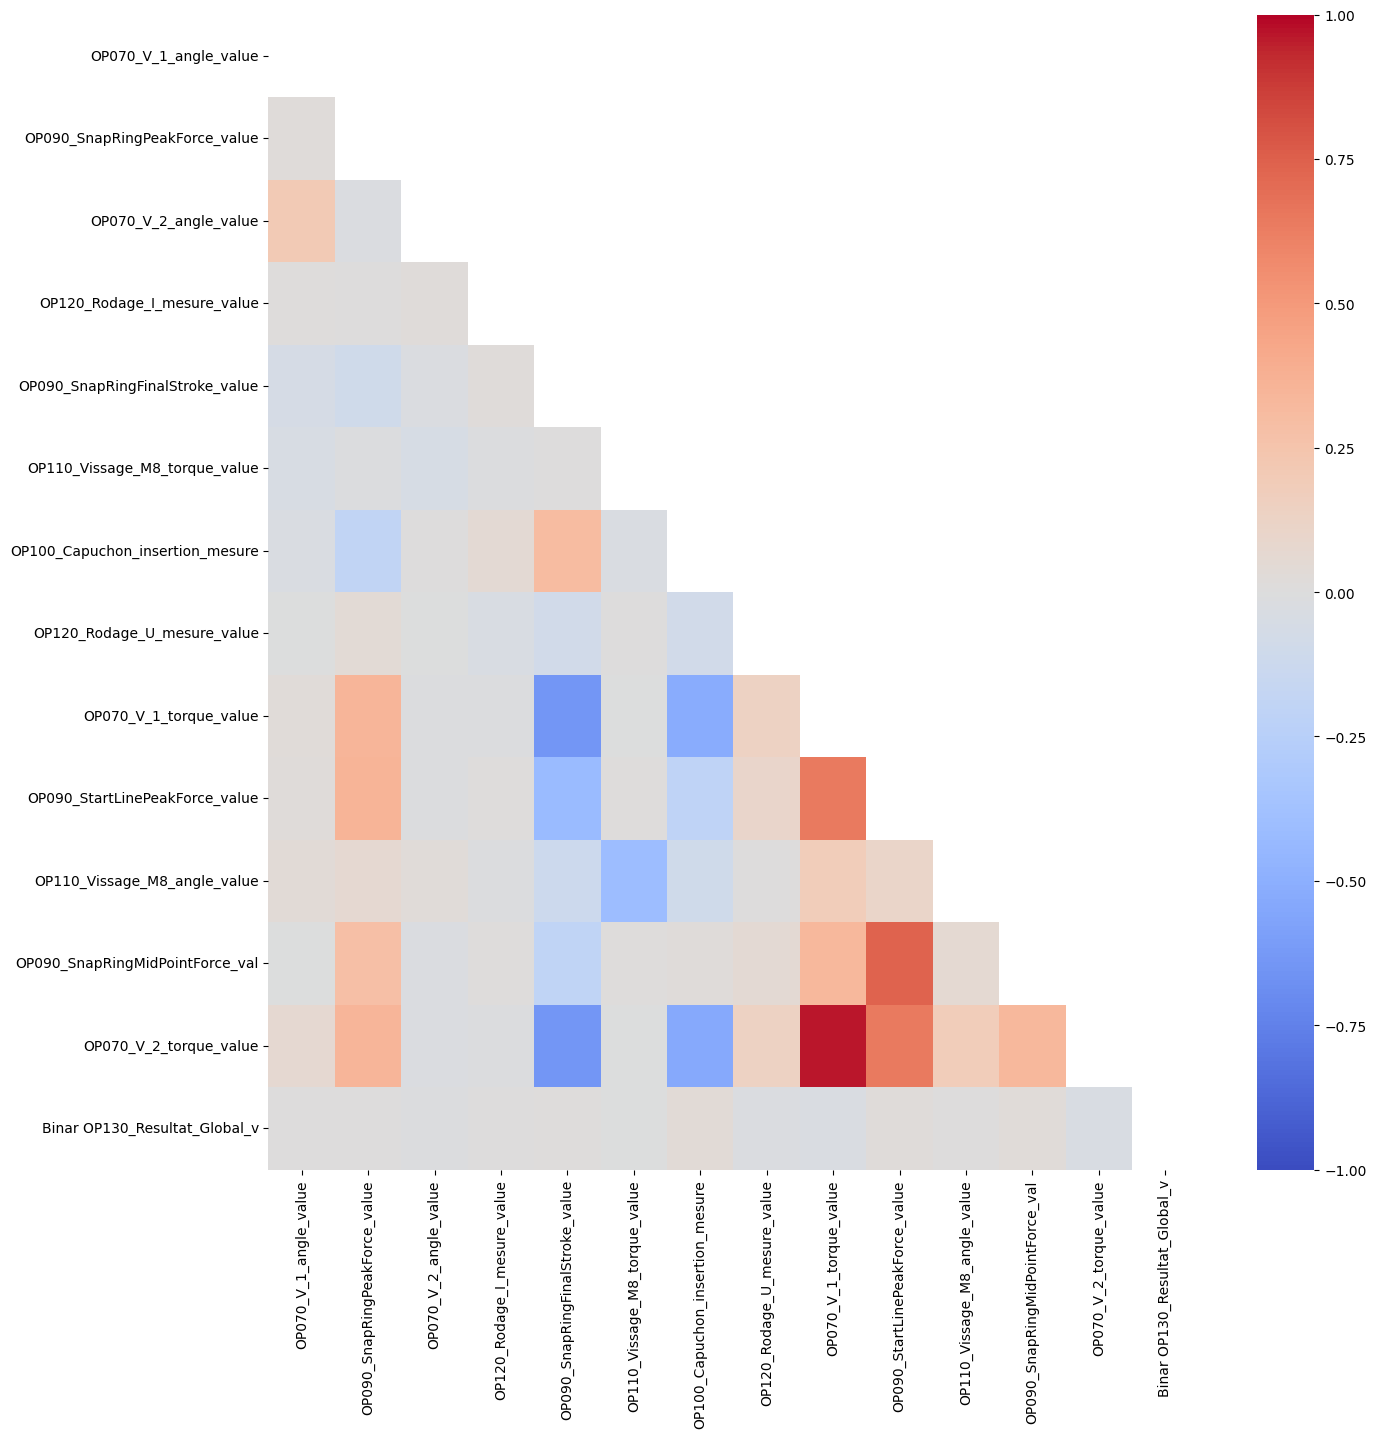

In [ ]:
visualization.plot_corr(df_training_nonull, width=15, height=15, 
                        print_value=False)

In [ ]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_nonull, target_feature='Binar OP130_Resultat_Global_v')

features_corr[:12]

Binar OP130_Resultat_Global_v      1.00
OP100_Capuchon_insertion_mesure    0.03
OP070_V_1_torque_value            -0.03
OP090_SnapRingMidPointForce_val    0.03
OP070_V_2_torque_value            -0.03
OP120_Rodage_U_mesure_value       -0.02
OP090_StartLinePeakForce_value     0.02
OP070_V_2_angle_value             -0.01
OP090_SnapRingFinalStroke_value    0.01
OP110_Vissage_M8_torque_value     -0.01
OP070_V_1_angle_value              0.00
OP090_SnapRingPeakForce_value      0.00
Name: Binar OP130_Resultat_Global_v, dtype: float64

In [ ]:
val = df_training_nonull['Binar OP130_Resultat_Global_v'].values
np.count_nonzero(val == 1)

195

### mod


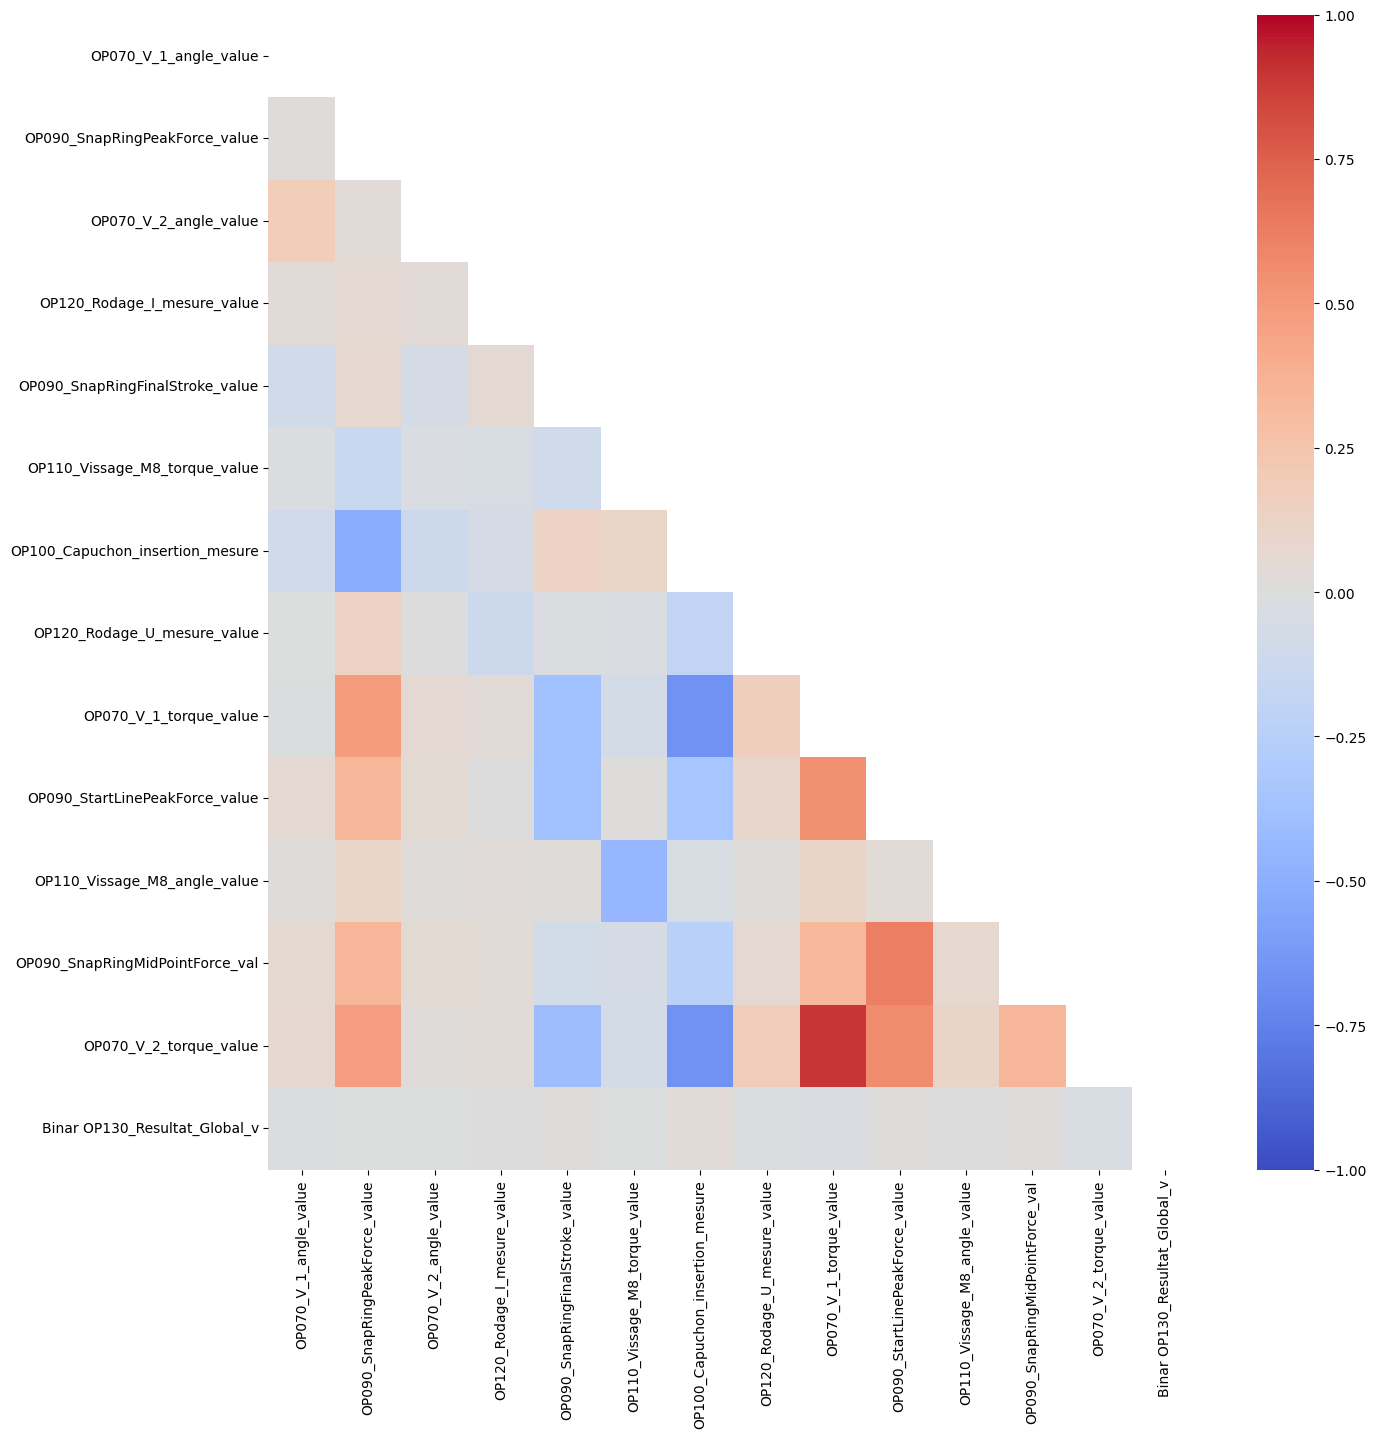

In [62]:
visualization.plot_corr(df_training_mod, width=15, height=15, 
                        print_value=False)

In [63]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_mod, target_feature='OP070_V_2_torque_value')

features_corr[:12]

OP070_V_2_torque_value             1.00
OP070_V_1_torque_value             0.90
OP100_Capuchon_insertion_mesure   -0.67
OP090_StartLinePeakForce_value     0.56
OP090_SnapRingPeakForce_value      0.48
OP090_SnapRingFinalStroke_value   -0.41
OP090_SnapRingMidPointForce_val    0.35
OP120_Rodage_U_mesure_value        0.17
OP110_Vissage_M8_angle_value       0.11
OP070_V_1_angle_value              0.07
OP110_Vissage_M8_torque_value     -0.07
Binar OP130_Resultat_Global_v     -0.04
Name: OP070_V_2_torque_value, dtype: float64

In [64]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_mod, target_feature='OP090_SnapRingMidPointForce_val')

features_corr[:12]

OP090_SnapRingMidPointForce_val    1.00
OP090_StartLinePeakForce_value     0.62
OP090_SnapRingPeakForce_value      0.35
OP070_V_2_torque_value             0.35
OP070_V_1_torque_value             0.33
OP100_Capuchon_insertion_mesure   -0.25
OP090_SnapRingFinalStroke_value   -0.08
OP070_V_1_angle_value              0.07
OP110_Vissage_M8_angle_value       0.07
OP110_Vissage_M8_torque_value     -0.06
OP120_Rodage_U_mesure_value        0.06
OP070_V_2_angle_value              0.05
Name: OP090_SnapRingMidPointForce_val, dtype: float64

### Suppression colonne 0P70_V_1_torque_value

In [65]:
df_training_mod = df_training.drop(columns=["OP070_V_1_torque_value"])


In [66]:
df_training_mod

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,26.37,18.8,109.62,6.60,0
1,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,21.03,18.5,105.48,6.40,0
2,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,25.81,17.5,100.03,6.61,0
3,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,24.62,15.6,104.94,6.61,0
4,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,29.22,33.6,99.19,6.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,158.2,168.40,180.6,110.65,11.88,12.23,NaN,11.98,24.03,14.8,98.76,6.61,0
34511,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,21.52,15.5,98.37,6.40,0
34512,165.5,157.34,149.8,112.77,12.09,12.17,NaN,11.97,22.65,24.4,92.92,6.62,0
34513,152.4,165.07,140.0,111.19,12.06,12.34,NaN,11.97,20.77,13.6,101.21,6.60,0


### Sauvegarde du dataset de training

In [55]:
df_training_mod.csv = df_training_mod.to_csv(path_or_buf="./df_training_mod.csv")